<a href="https://colab.research.google.com/github/MELAI-1/MY-PROJECT/blob/main/machine-learning/melvin_ml_t2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to ML

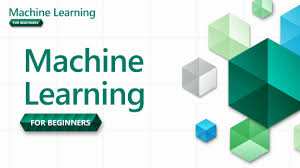

<a id="contents"></a>
# <p style="background-color: #265576; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Table Of Contents</p>

- <a href="#setup">A. setup</a>
  - <a href="#mount">a.1. Mount the google drive in colab </a>
  - <a href="#libraries">a.2. Installing Required Libraries</a>

- <a href="#tutorial2">I-Tutorial 2 :Classifier </a>
  - <a href="#intro2">Introduction</a>
  - <a href="#tutorial1">2.1 Tutorial 1</a>
  - <a href="#tutorial1">2.2 Tutorial 1</a>
  - <a href="#tutorial1">2.3 Tutorial 1</a>
  - <a href="#tutorial1">2.4 Tutorial 1</a>



<a id="setup"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px"> **A-Setup**</p>

<a id="mount"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">a.1. Mount the Google Drive in colab</p>

Mounting  Google Drive to Colab  allows us to access and save files directly from our Drive, making it easier to work with our data and projects.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

<a id="libraries"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">a.2. Installing Required Libraries</p>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys, os



For this turorial, we will be using the following libraries:
 - [`pandas`] for managing the data.
 - [`numpy`] for mathematical operations.
 - [`seaborn`] for visualizing the data.
 - [`matplotlib`] for visualizing the data.
 - ['os'] for management system

# **Tutorial 2:Classifier**

<a id="intro1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px"> Introduction: calorimeter showers</p>



**A calorimeter** in the context of experimental particle physics is a sub-detector aiming at measuring the energy of incoming particles. At CERN Large Hadron Collider, the giant multipurpose detectors ATLAS and CMS are both equipped with electromagnetic and hadronic calorimeters. The electronic calorimeter, as its name indicates, is measuring the energy of incoming electrons. It is a destructive method: the energetic electron entering the calorimeter will interact with its dense material via the electromagnetic force. It eventually results in the generation of a shower of particles (electromagnetic shower), with a characteristic average depth and width. The depth is along the direction of the incoming particle and the width is the dimension perpendicular to it.

**Problem?** There can be noisy signals in electromagnetic calorimeters that are generated by hadrons, not electrons.

**our mission** is to help physicists by coding a classifier to select electron-showers (signal) from hadron-showers (background).



<a id="part31"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Part I: Linear Classifier By Hand </p>

##  Get the data

<a id="data2"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">P I: Linear Classifier By Hand </p>

In [ ]:
df=pd.read_csv('/content/ml_tutorial_2_calo_shower_data.csv')

In [ ]:
df

,shower_depth,shower_width,type
0,102.726547,41.060509,hadron
1,55.953644,19.107106,electron
2,76.237938,21.859595,electron
3,145.829765,18.478401,hadron
4,151.974596,33.539821,hadron
...,...,...,...
99995,94.844879,22.915035,electron
99996,91.389386,21.634711,electron
99997,66.610819,23.150888,electron
99998,94.607568,25.352104,electron


In [ ]:
df.columns

Index(['shower_depth', 'shower_width', 'type'], dtype='object')

In [ ]:
df.describe()

,shower_depth,shower_width
count,100000.000000,100000.000000
mean,99.847703,25.060322
std,31.360512,9.073636
min,0.013479,0.139829
25%,80.005289,18.726105
50%,97.648121,22.890813
75%,121.048161,30.209608
max,222.651768,73.082693


## Labels to Binary

In [ ]:
df.loc[df['type']=='hadron',['type']]=1

In [ ]:
df.loc[df['type']=='electron',['type']]=0

In [ ]:
df

,shower_depth,shower_width,type
0,102.726547,41.060509,1
1,55.953644,19.107106,0
2,76.237938,21.859595,0
3,145.829765,18.478401,1
4,151.974596,33.539821,1
...,...,...,...
99995,94.844879,22.915035,0
99996,91.389386,21.634711,0
99997,66.610819,23.150888,0
99998,94.607568,25.352104,0


## Create Feature Matrix

In [ ]:
X=df.drop('type',axis=1)
y=df['type']

#check shapes

print("X shape:",X.shape)
print("Y shape:",y.shape)

X shape: (100000, 2)
Y shape: (100000,)


## Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape},  y_test: {y_test.shape}")

X_train: (80000, 2), y_train: (80000,)
X_test:  (20000, 2),  y_test: (20000,)


##  Feature Scaling

In [ ]:
# Get mean and std from training data
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)

# Standardize training
X_train_scaled = (X_train - mean_train) / std_train

# Standardize test data
X_test_scaled  = (X_test-X_test.mean(axis=0))/X_test.std(axis=0)

# Check
print("X_train_scaled mean:", X_train_scaled.mean(axis=0))
print("X_train_scaled std:", X_train_scaled.std(axis=0))

X_train_scaled mean: shower_depth   -2.447820e-16
shower_width    1.936229e-16
dtype: float64
X_train_scaled std: shower_depth    1.0
shower_width    1.0
dtype: float64


# Feature Matrix Augmentation

In [ ]:
X_train_aug = np.hstack((X_train_scaled, np.ones((X_train_scaled.shape[0]),1)
X_test_aug  = np.hstack((X_test_scaled, np.ones(X_test_scaled.shape[0]),1)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-1493763738.py, line 1)